In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [2]:
df = pd.read_csv('data/train.csv')

Just to check the distribution of each feature, but nothing interesting here, except for 8.
It seems to be a bool feature, with half of the dataset having a value of 0 and the other half having a value of 1.

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

And here starts the interesting moments.
As we see in all plots, except for 6 and 8, the distribution of features relative to the target has a "white-noise" pattern. That means that the correlation between the target and features will be around 0.
The plot 8 also does not contain any dependence on the target.
The plot 6 has a near-quadratic dependence on the target, so it can be used in prediction.

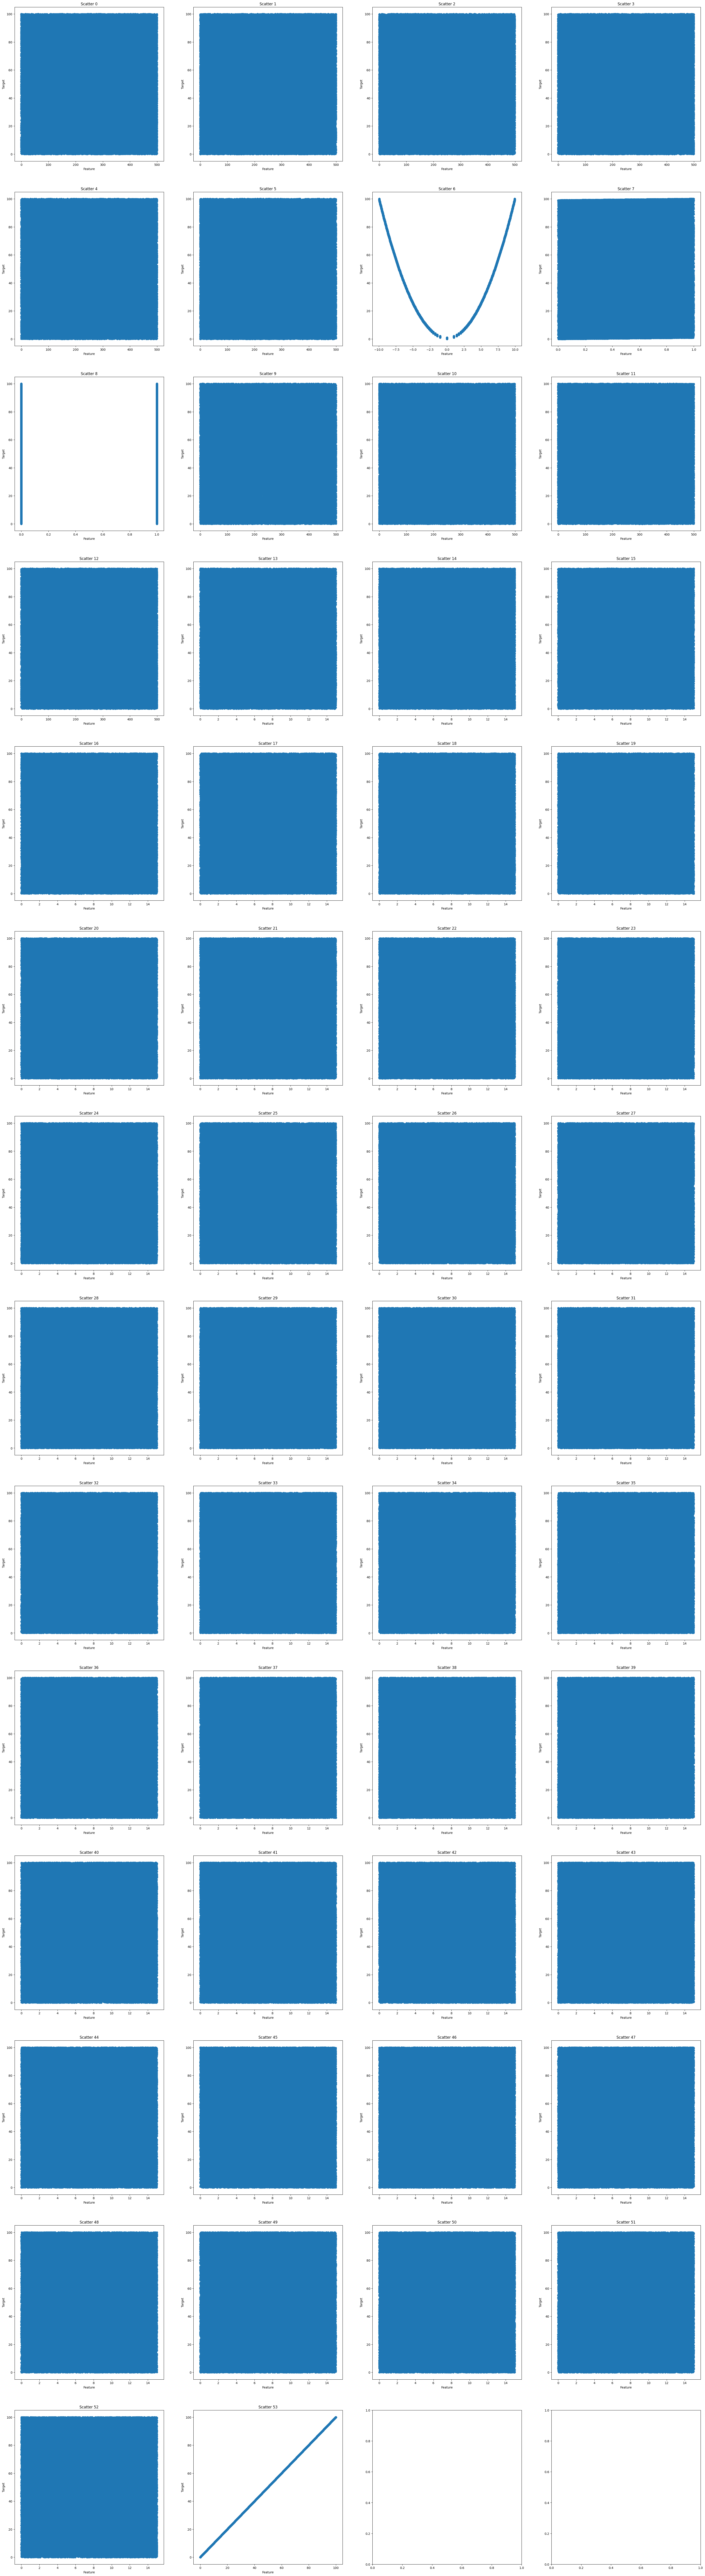

In [4]:
fig, ax = plt.subplots(14, 4, figsize=(40, 150))

for i, col in enumerate(df.columns):
    ax[i // 4][i % 4].scatter(df[col], df['target'])
    ax[i // 4][i % 4].set_xlabel('Feature')
    ax[i // 4][i % 4].set_ylabel('Target')
    ax[i // 4][i % 4].set_title(f'Scatter {i}')
plt.show()

Just the plot 6 in higher resolution.

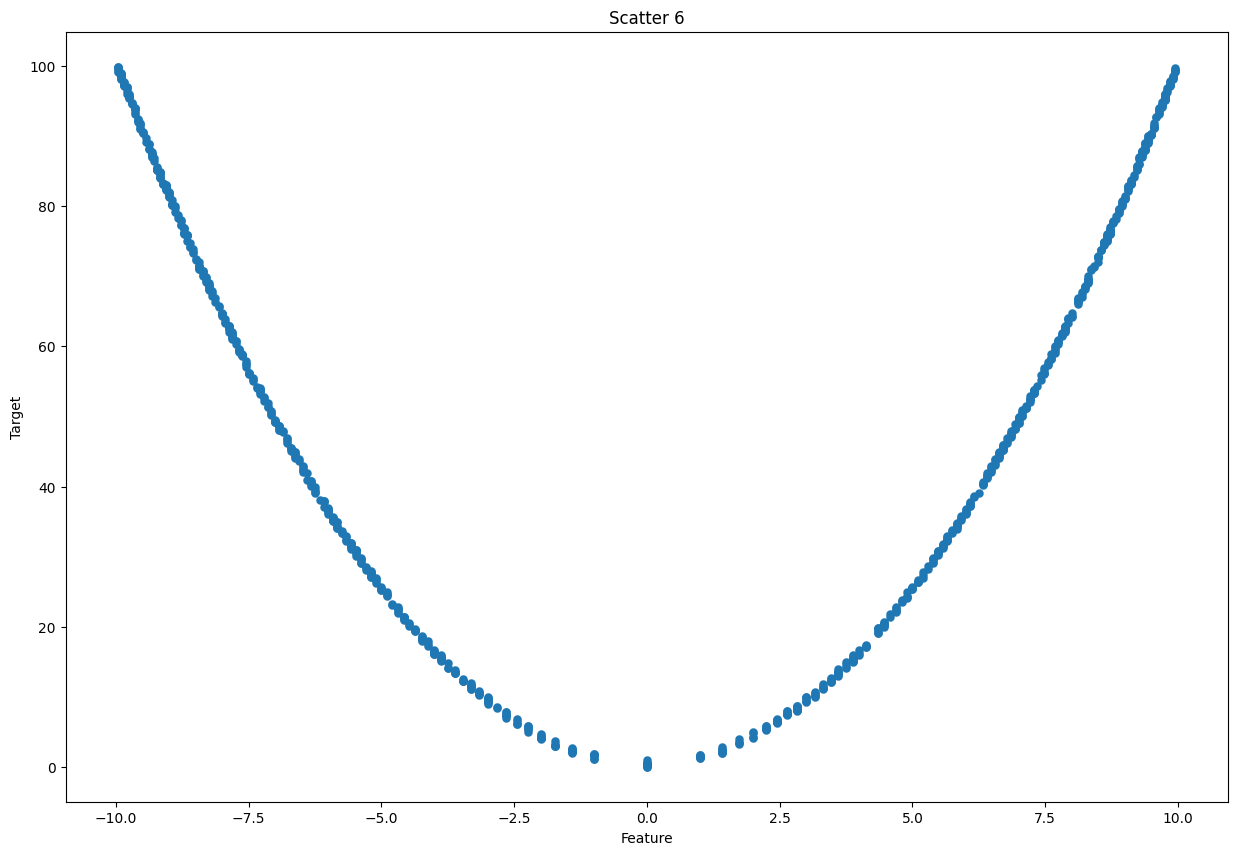

In [5]:
plt.figure(figsize=(15, 10))
plt.scatter(df['6'][:1000], df['target'][:1000], linewidths=0.1)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Scatter 6')
plt.show()

Confirmation that there is no correlation with the target anywhere. Correlation of 6 and 8 features in this case does not matter.
The lack of correlation between the 6 feature and the target is explained by non-linear dependence.

In [6]:
df.corr()[df.columns[:25]].style.background_gradient(cmap='coolwarm').format(precision=2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.00,0.00,0.00,0.00,-0.00,-0.01,0.01,0.01,0.01,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.01,0.00,0.00,-0.00,-0.01,-0.00,0.00,0.00
1,0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.00,0.01,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
2,0.00,-0.00,1.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,-0.00,0.00,0.01,0.00,0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
3,0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,0.01,0.00,-0.00,0.00,0.00,0.00,0.00
4,-0.00,-0.00,0.00,-0.00,1.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.01
5,-0.01,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.01
6,0.01,0.00,0.00,0.00,0.01,-0.00,1.00,-0.00,0.94,-0.01,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.01,-0.00,0.00,0.00,-0.00
7,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.01,-0.01,0.01,0.00,-0.00,0.01,-0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,-0.00,0.00
8,0.01,0.00,0.00,0.00,0.00,-0.00,0.94,0.00,1.00,-0.01,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.01,-0.00,0.00,0.00,0.01,-0.00,0.00,0.00,-0.00
9,0.00,0.00,0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.01,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.00,0.01,0.00,0.00,0.00


In [7]:
df.corr()[df.columns[25:]].style.background_gradient(cmap='coolwarm').format(precision=2)

,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.01,-0.00,0.00,0.01,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
1,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.01,0.01,-0.00,-0.01,-0.00,-0.00,0.00,0.01,-0.00,-0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.01,-0.00,0.00,0.00,0.01,-0.00,-0.01
2,0.00,-0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.01,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
3,-0.01,0.01,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,0.00,0.00,0.00,-0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
4,-0.00,0.01,-0.00,0.00,-0.00,0.00,0.00,-0.01,0.00,0.00,-0.00,-0.01,0.00,-0.01,0.00,-0.01,0.00,-0.00,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
5,0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.01,0.00,-0.01,0.01,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
6,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.01,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.01,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
7,-0.00,-0.01,-0.00,0.01,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.00,0.00,-0.00,-0.00,0.00,0.00,0.01,0.00,0.01
8,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.01,0.00,-0.00,0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.01,0.00,0.01,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00


Try to find hidden dependencies between "white-noise" features and target using PCA.

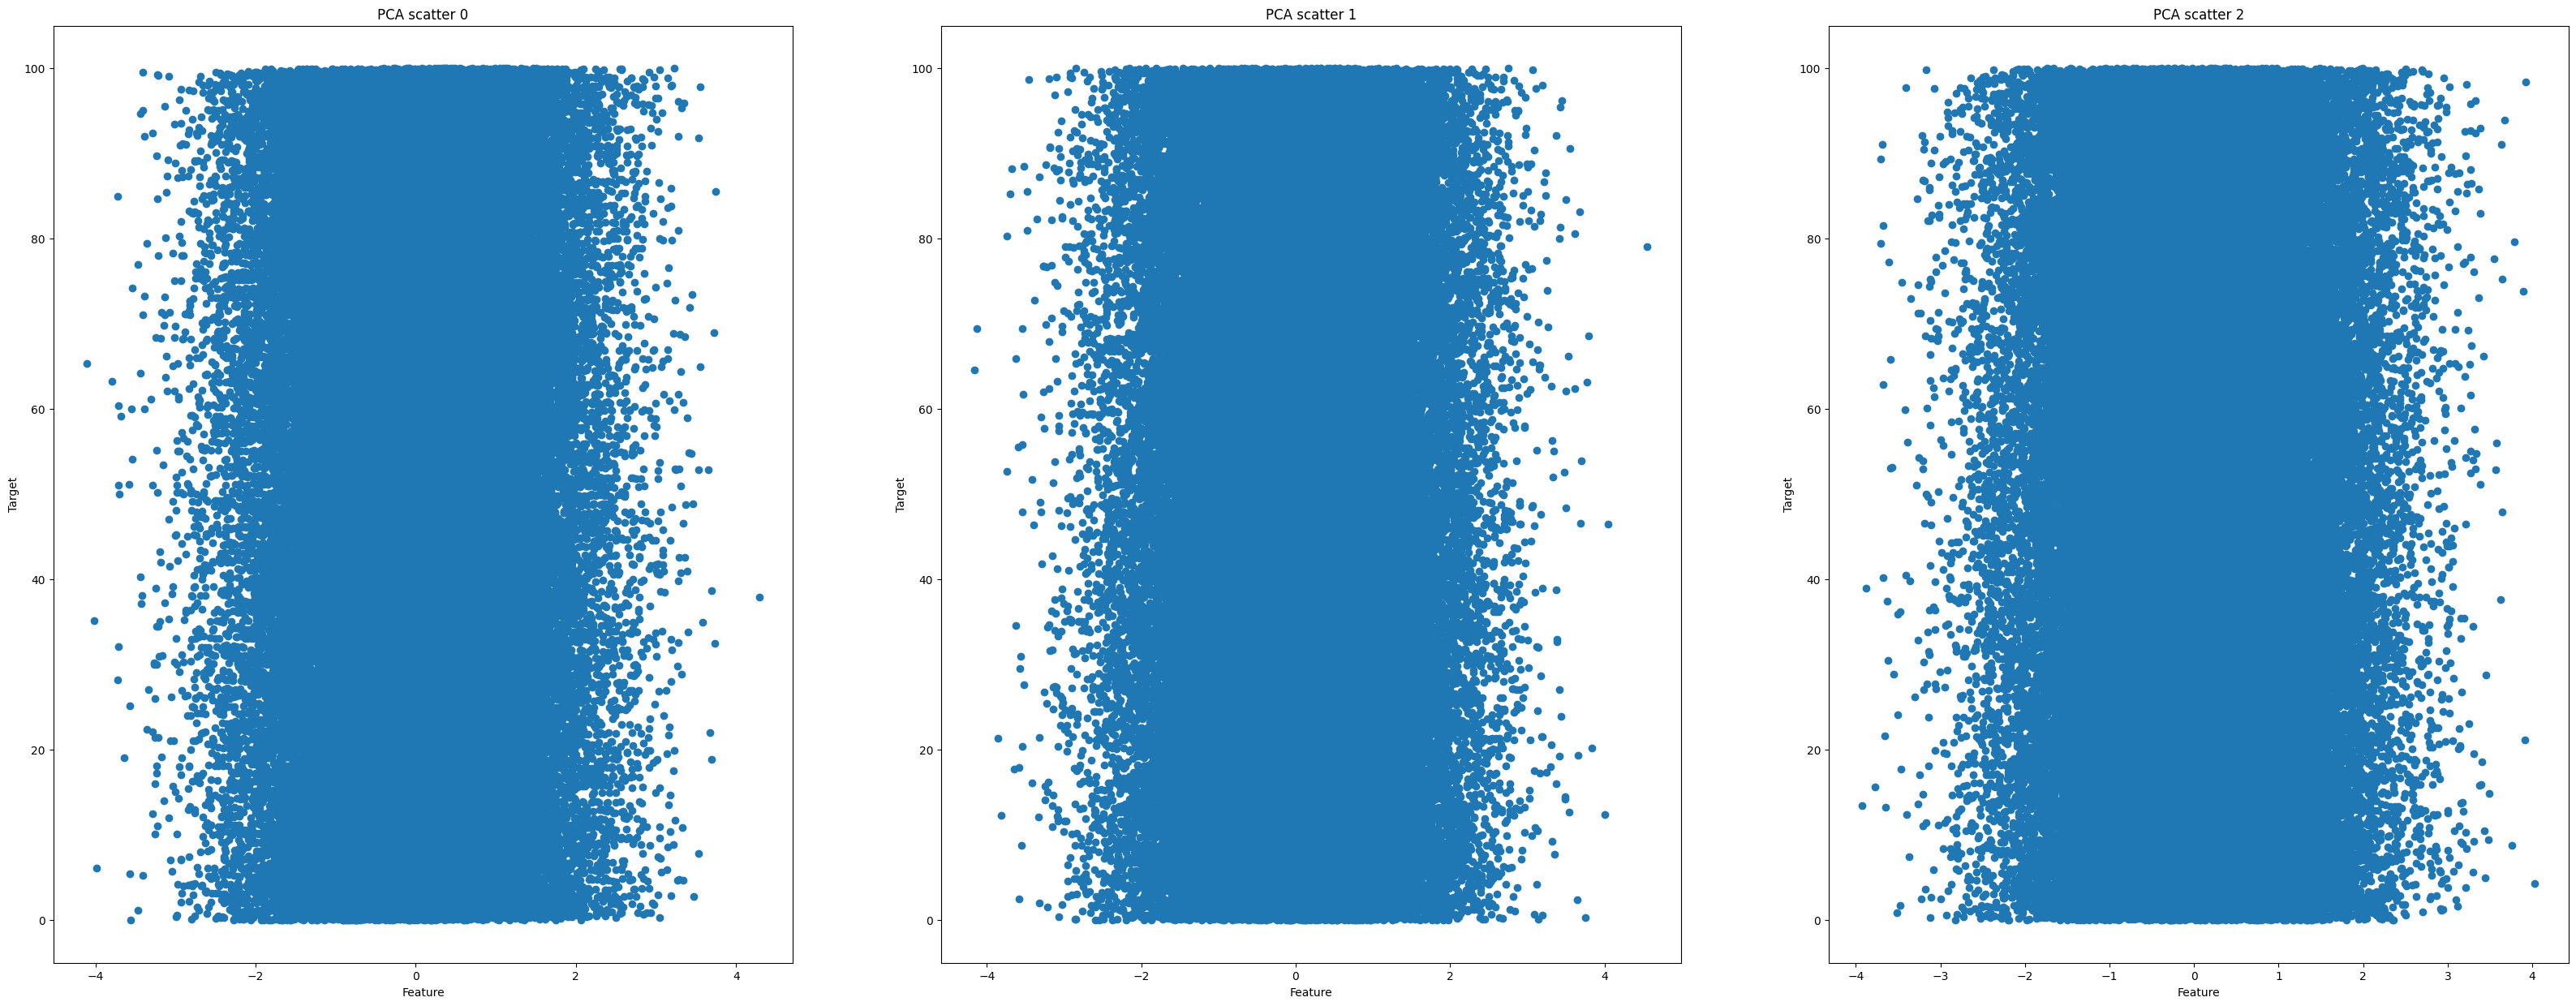

In [8]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df.drop(columns=['6', '8', 'target'])))
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df))

fig, ax = plt.subplots(1, 3, figsize=(40, 15))
for i, col in enumerate(pca_df.columns):
    ax[i].scatter(pca_df[col], df['target'])
    ax[i].set_xlabel('Feature')
    ax[i].set_ylabel('Target')
    ax[i].set_title(f'PCA scatter {i}')
plt.show()

pca_df['target'] = df['target']

PCA terms don't have correlation with target, so they are useless.

In [9]:
pca_df.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,0,1,2,target
0,1.00,-0.00,0.00,0.00
1,-0.00,1.00,-0.00,-0.00
2,0.00,-0.00,1.00,-0.00
target,0.00,-0.00,-0.00,1.00


Conclusion: Only one feature 6 has a dependency on the target, so in the model, only this feature will be used.
This dependency can be predicted by a polynomial regressor with a quadratic term.